<a href="https://colab.research.google.com/github/guptaprateek98/capstone_hotel/blob/main/Copy_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
h_df = pd.read_csv('/content/drive/MyDrive/hotel_capstone/Copy_of Hotel Bookings.csv')

In [ ]:
h_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
h_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

##**Comparision between two hotels on basis of cancellation rate for previous months.**

In [ ]:
total_city = h_df.loc[h_df['hotel'] == 'City Hotel', ['is_canceled','arrival_date_year','arrival_date_month']]
total_resort = h_df.loc[h_df['hotel'] == 'Resort Hotel',['is_canceled','arrival_date_year','arrival_date_month']]

In [ ]:
city_count = total_city['is_canceled'].count()
city_count_not_cancel = total_city.loc[total_city['is_canceled']==0,'is_canceled'].count()

In [ ]:
resort_count = total_resort['is_canceled'].count()
resort_count_not_cancel = total_resort.loc[total_resort['is_canceled']==0,'is_canceled'].count()

In [ ]:
resort_count_not_cancel

28938

In [ ]:
total_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79330 entries, 40060 to 119389
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   is_canceled         79330 non-null  int64 
 1   arrival_date_year   79330 non-null  int64 
 2   arrival_date_month  79330 non-null  object
dtypes: int64(2), object(1)
memory usage: 2.4+ MB


In [ ]:
totalcity = total_city.groupby(['is_canceled','arrival_date_year','arrival_date_month']).agg({'arrival_date_month': 'count'}).unstack()

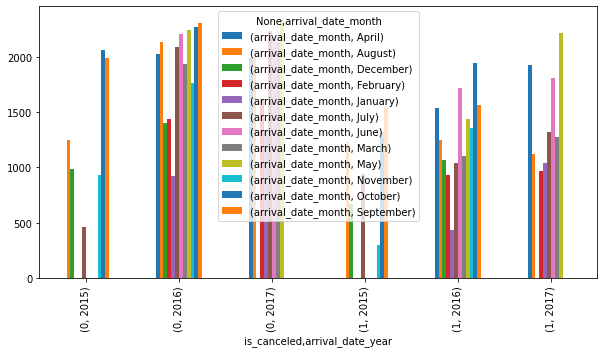

In [ ]:
#plt.figure(figsize=(20,15))
plt.rcParams['figure.figsize'] = (10, 5)
totalcity.plot.bar()


In [ ]:
total_resort.count()

is_canceled           40060
arrival_date_year     40060
arrival_date_month    40060
dtype: int64

In [ ]:
h_df['overall_cancelation'] = h_df['previous_cancellations'] + h_df['is_canceled']
h_df['overall_cancelation']

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: overall_cancelation, Length: 119390, dtype: int64

In [ ]:
#hdf = h_df[~h_df['overall_cancelation'] == 0, ['hotel','overall_cancelation','']]

In [ ]:
book_cancel_df = h_df.groupby(['hotel'])['previous_cancellations'].value_counts()

In [ ]:
book_cancel_df

hotel         previous_cancellations
City Hotel    0                         73941
              1                          5155
              2                            72
              3                            51
              11                           35
              4                            25
              6                            22
              5                            16
              13                           12
              21                            1
Resort Hotel  0                         38965
              1                           896
              24                           48
              2                            44
              26                           26
              25                           25
              19                           19
              3                            14
              14                           14
              4                             6
              5                            

In [ ]:
#book_cancel_df = h_df.groupby(['hotel','arrival_date_year',''])['previous_cancellations'].sum().unstack()

In [ ]:
h_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,overall_cancelation
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,0


In [ ]:
h_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'overall_cancelation'],
      dtype='object')

In [ ]:
h_df['is_repeated_guest'].value_counts()

0    115580
1      3810
Name: is_repeated_guest, dtype: int64

In [ ]:
only_repeated_cust = h_df[h_df['is_repeated_guest']==1]

In [ ]:
cust_retention = only_repeated_cust.groupby(['hotel','customer_type'])['is_repeated_guest'].count().unstack()

In [ ]:
cust_retention

customer_type,Contract,Group,Transient,Transient-Party
hotel,,,,
City Hotel,14,48,1618,352
Resort Hotel,19,113,1455,191


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

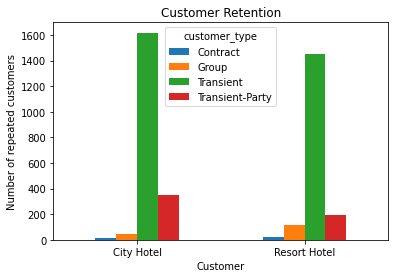

In [ ]:
cust_retention.plot.bar()

plt.title('Customer Retention')
plt.ylabel('Number of repeated customers')
plt.xlabel('Customer')
plt.xticks(rotation = 0)

In [ ]:
type(cust_retention)

pandas.core.frame.DataFrame